Wczytanie bazy danych

In [161]:
import pandas as pd
import numpy as np
import openpyxl
import ssl
import matplotlib.pyplot as plt

csv = 'fatal-police-shootings-data.csv'
DataFrame = pd.read_csv(csv)
DataFrame.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [162]:
df_race_illness = DataFrame.pivot_table(values = 'id', index = 'race', columns ='signs_of_mental_illness',aggfunc = 'count')
#tabela z podziałem na choroby psychiczne i rase
df_race_illness



signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [163]:
mental_ratio = DataFrame.groupby('race')['signs_of_mental_illness'].mean().round(2)     #odsetek osoób z chorobami psychicznymi


df_race_illness['Ratio'] = mental_ratio
sorted_ratio = df_race_illness.sort_values(by = 'Ratio', ascending = False)

sorted_ratio



signs_of_mental_illness,False,True,Ratio
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


In [164]:
DataFrame.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [165]:
DataFrame['date'] = pd.to_datetime(DataFrame['date'])
DataFrame['weekday'] = DataFrame['date'].dt.day_name()

DataFrame.groupby('weekday')['id'].count()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']          #nie da się mądrzej?
weekday_sorted = DataFrame['weekday'].value_counts().reindex(weekday_order)

weekday_sorted

weekday
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

Wykres

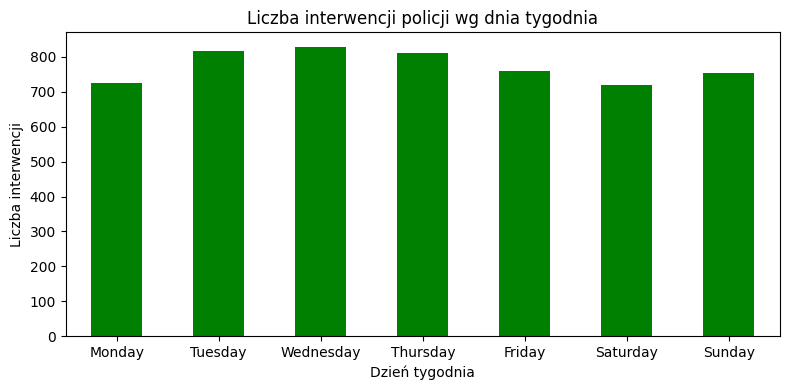

In [173]:
plt.figure(figsize=(8, 4))
weekday_sorted.plot(kind='bar', color='green')
plt.title('Liczba interwencji policji wg dnia tygodnia')
plt.ylabel('Liczba interwencji')
plt.xlabel('Dzień tygodnia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Porównanie tabel zewnętrznych 

In [ ]:


populacja = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header = 0)         #problem z certyfikatami SSL na słuzbowym łączu, jak to ominąć
df_populacja = populacja[0]
df_populacja.head()

skroty = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header =0)
df_skroty = skroty[1]

df_skroty = df_skroty.iloc[1:].reset_index(drop=True)
df_skroty

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
1,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
2,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
3,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
4,Arkansas,State,US-AR,AR,5.0,AR,AR,Ark.,Ark.,NaN
...,...,...,...,...,...,...,...,...,...,...
73,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
74,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
75,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
76,Philippine Islands,Obsolete postal code,PH PHL 608[11],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [130]:
df_skroty = df_skroty[['Name', 'USPS']].dropna()            #wybrane kolumny i usuniecie pustych
df_skroty.head()

,Name,USPS
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR
5,California,CA


In [131]:
df_populacja.head()
df_populacja = df_populacja[['State', 'Census population, April 1, 2020 [1][2]']]
df_populacja.rename(columns = {'Census population, April 1, 2020 [1][2]': 'Population'}, inplace = True)
df_populacja.head()

C:\Users\kkleps\AppData\Local\Temp\ipykernel_31372\1426900260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_populacja.rename(columns = {'Census population, April 1, 2020 [1][2]': 'Population'}, inplace = True)


,State,Population
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


Połączenie tabel

In [135]:
populacja_merge =pd.merge(df_populacja, df_skroty, how = 'inner', left_on = 'State', right_on = 'Name')
populacja_merge = populacja_merge[['USPS', 'State', 'Population']].rename(columns = {'USPS': 'Abbreviation'})
populacja_merge.head()

,Abbreviation,State,Population
0,CA,California,39538223
1,TX,Texas,30145505
2,FL,Florida,21538187
3,NY,New York,20201249
4,PA,Pennsylvania,13002700


In [145]:
liczba_incydentow = DataFrame.groupby('state')['id'].count().reset_index(name = 'incidents')
liczba_incydentow.head()


,state,incidents
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799


In [155]:
tabela_koncowa = pd.merge(populacja_merge, liczba_incydentow, how = 'inner', left_on = 'Abbreviation', right_on = 'state').head()

print(tabela_koncowa.columns)

Index(['Abbreviation', 'State', 'Population', 'state', 'incidents'], dtype='object')


Dodanie wyliczonej kolumny incydenty na 1000 mieszkańców

In [158]:
def incydenty_na_1000(row):

    wynik = row['incidents'] / row['Population'] * 1000
    return wynik

tabela_koncowa['incidents per 1000'] = tabela_koncowa.apply(lambda row: incydenty_na_1000(row), axis = 1).round(3)

tabela_koncowa.head()

,Abbreviation,State,Population,state,incidents,incidents per 1000
0,CA,California,39538223,CA,799,0.020
1,TX,Texas,30145505,TX,481,0.016
2,FL,Florida,21538187,FL,350,0.016
3,NY,New York,20201249,NY,101,0.005
4,PA,Pennsylvania,13002700,PA,108,0.008
